# Исследование интернет-магазина компьютерных игр «Стримчик».

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### Шаг. Считывание CSV-файла и изучение общей информации о данных.

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('C:/Users/Ksenon/Desktop/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Итог:**
- в датафрейме `games` содержится 16715 строк и 11 столбцов;
- названия столбцов нужно привести к змеиному регистру;
- некорректный тип данных в некоторых столбцах;
- пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.

### Шаг. Предобработка данных.

#### Исправление названий столбцов.

In [5]:
games.columns = games.columns.str.lower()

#### Обработка пропусков.

In [6]:
games = games.dropna(subset=['name', 'genre', 'year_of_release']).reset_index(drop=True)

* столбцы `'name'`, `'genre'`, `'year_of_release'` имеют по 2, 2 и 269 пропусков соответственно. Заполнить их приемлемыми значениями не представляется возможным, а удаление не исказит общую картину.
* причиной пропусков в `'name'` и `'genre'` мог послужить человеческий фактор (просто забыли указать значения).
* причиной пропусков в `'year_of_release'` могло стать отсутствие информации о годе выпуска игры.

In [7]:
games['rating'].unique() # Проверю уникальные значения в столбце

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Согласно официальной документации ESRB категория `'K-A'` является устаревшей и относится теперь к категории `'E'`. Заменим рейтинг `'K-A'` на `'E'`.

In [8]:
games['rating'] = games['rating'].replace({'K-A':'E'}).reset_index(drop=True)

* адекватно заполнить оставшиеся пропуски в столбце `'rating'` так же не представляется возможным, ведь ни медиана, ни среднее значение не будут отражать реальную картину. Проигнорируем пропуски.
* причиной пропусков в столбце `'rating'` могло стать отсутствие классификации игры по системе ESRB, потому что такая система применяется в основном в США, Мексике и Канаде, а в европейских странах используется система PEGI.

In [9]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [11]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

In [12]:
games['user_score'].isna().sum()

8981

* значение `'tbd'` может означать To Be Determined, то есть "Будет определено". Это может означать, что пользовательский рейтинг для игры ещё не определён. Игр с таким пользовательским рейтингом 2376, это слишком большой объём данных, чтобы его удалить, но так как это по сути неизвестные значения их можно заменить на NaN, чтобы можно было привести столбец к числовому типу данных.
* пропусков в столбце `'user_score'` теперь 8981, что так же слишком много чтобы просто удалить эти значения, но и при заполнении медианой или средним по столбцу в итоге наше исследование может стать необъективным. Прооигнорируем пропуски.
* причиной пропусков в столбце `'user_score'` может быть отсутствие информации на момент создания датафрейма, скорее всего пользовательский рейтинг ещё просто не успел сформироваться.

#### Преобразование данных в нужные типы.

In [13]:
games.dtypes # Типы данных в столбцах

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [14]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')

В столбце `'year_of_release'` изменила тип данных на `'datetime64'` так как это правильный формат для даты.

In [15]:
games['user_score'] = games['user_score'].astype(float)

Заменила тип данных со строкового на числовой с плавающей точкой, так как рейтингу стоит быть в числовом формате.

In [16]:
# Приведу данные в столбцах к нижнему регистру, чтобы избежать дубликатов
games[['name', 'platform', 'genre']] = games[['name', 'platform', 'genre']].apply(lambda x: x.str.lower())

In [17]:
games.duplicated().sum() # Проверка на явные дубликаты

0

In [18]:
# Проверю наличие дубликатов по названию игры, платформе и году выпуска
duplicated = games[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
duplicated

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,madden nfl 13,ps3,2012-01-01,sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,madden nfl 13,ps3,2012-01-01,sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [19]:
games.drop(labels=15969, axis=0, inplace=True)

#### Суммарные продажи во всех регионах.

In [20]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

**Итог раздела:**
1. Привела названия столбцов к нижнему регистру.
2. Удалила пропуски из столбцов `'name'`, `'genre'`, `'year_of_release'`.
3. Заменила категорию `'K-A'` на `'E'` в столбце `'rating'` так как она являлась устаревшей.
4. Заменила значение `'tbd'` на NaN.
5. Заменила тип данных в столбце `'year_of_release'` на `'datetime64'`.
6. Заменилп тип данных в столбце `'user_score'` на `'float'`.
7. Явных дубликатов в данных нет.
8. Удалила неявно дублирующуюся строку `15969`.

### Шаг. Исследовательский анализ данных.

#### Сколько игр выпускалось в разные годы.

In [21]:
games_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_year

,name
year_of_release,
1980-01-01,9
1981-01-01,46
1982-01-01,36
1983-01-01,17
1984-01-01,14
1985-01-01,14
1986-01-01,21
1987-01-01,16
1988-01-01,15


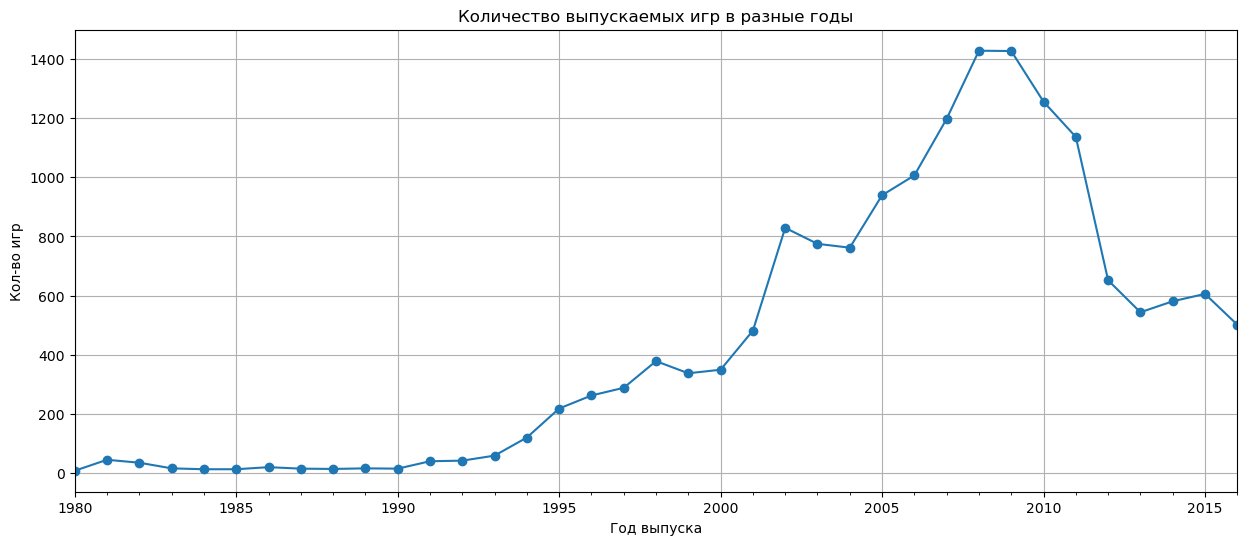

In [22]:
games_year.plot(grid=True, marker='o', figsize=(15, 6), legend=False)

plt.title('Количество выпускаемых игр в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во игр')

plt.show()

Количество игр, которые выпускали с 1980 по 1995 год ничтожно мало по сравнению с количеством выпускаемых игр в последующие годы, значит эти данные можно не использовать при анализе.

#### Анализ платформ.

In [23]:
#Сводная таблица, сгруппированная по платформам и суммарным продажам, отсортированная по убыванию.
games_platform = games.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum'
).sort_values(
    by='total_sales', 
    ascending=False
)
games_platform

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.33
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


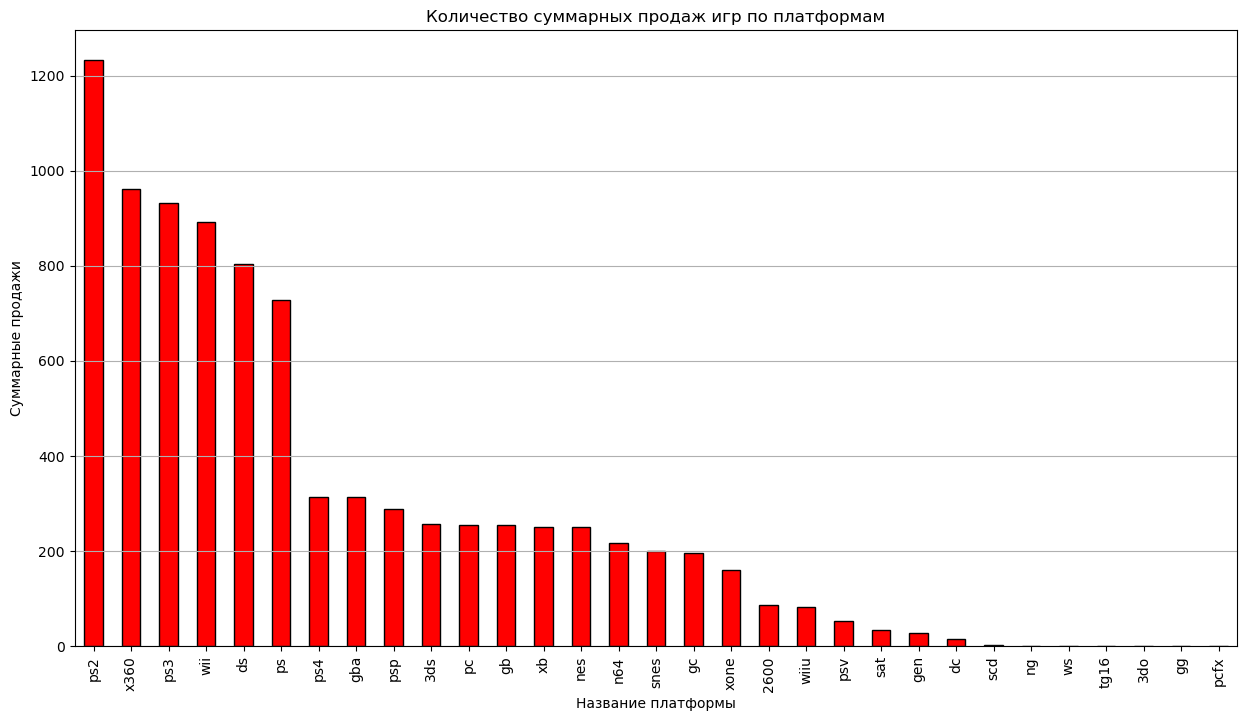

In [24]:
games_platform.plot(kind='bar', figsize=(15, 8), legend=False, color = 'red', ec='black')

plt.title('Количество суммарных продаж игр по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи')
plt.grid(axis='y')

plt.show()

Первые 6 платформ имеют самые высокие суммарные продажи, разница между 6 и 7 местом больше чем в два раза, значит остальные платформы можно не использовать при анализе.

#### Распределение продаж платформ по годам.

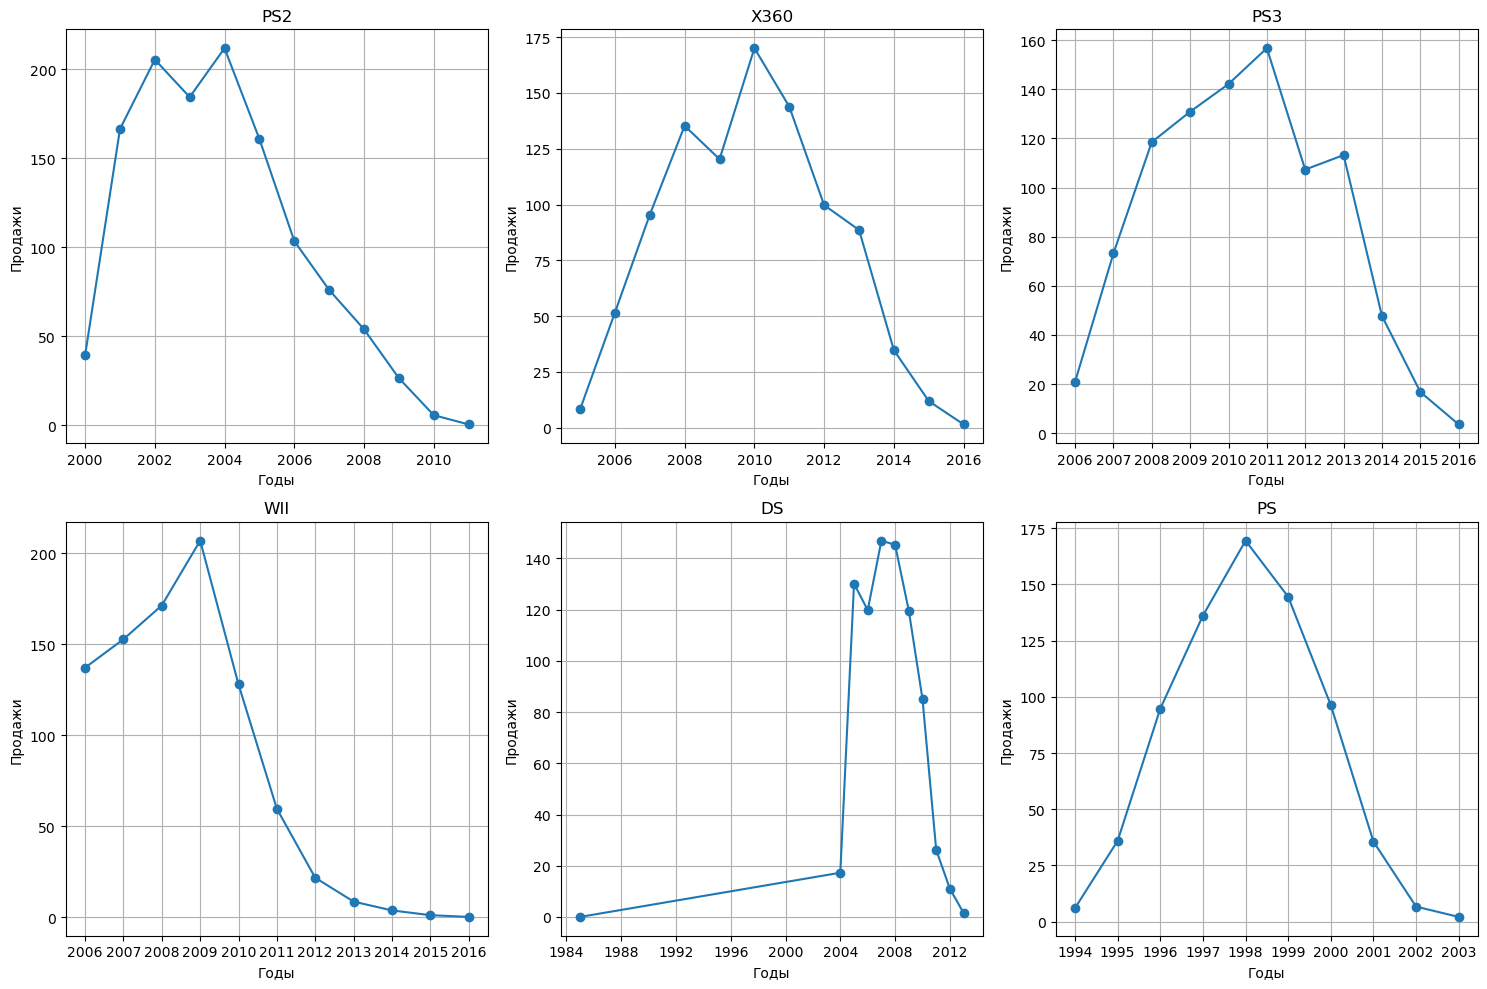

In [25]:
#Платформы с самыми большими продажами
platforms = games.groupby('platform').agg({'total_sales': 'sum'}).sort_values(
    by='total_sales', 
    ascending=False).head(6).index.to_list()

plt.figure(figsize=(15, 10))

i = 1

for platform in platforms:
    platform_data = games[games['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.subplot(2, 3, i)
    plt.plot(platform_data.index, platform_data.values, marker='o')
    plt.title(f'{platform.upper()}')
    plt.xlabel('Годы')
    plt.ylabel('Продажи')
    plt.grid()
    
    i += 1
    
plt.tight_layout()
plt.show()

Судя по графикам срок жизненного цикла платформ находится в районе 10 лет.

In [26]:
# Так же можно найти примерный срок жизни платформ с помощью расчётов
games.groupby('platform')['year_of_release'].nunique().mean()

7.67741935483871

К актуальным можно отнести данные за ближайшие 3 года, исходя из жизненного цикла платформ и учитывая высокую динамичность рынка, то есть с 2014 по 2016 год. Так мы сможем выделить успешные платформы, которые на 2017 год будут находиться в периоде финального роста или выйдут на плато.

In [27]:
# Создам таблицу с актуальными данными
current_data = games[(games['year_of_release'].dt.year >= 2014)].reset_index(drop=True)

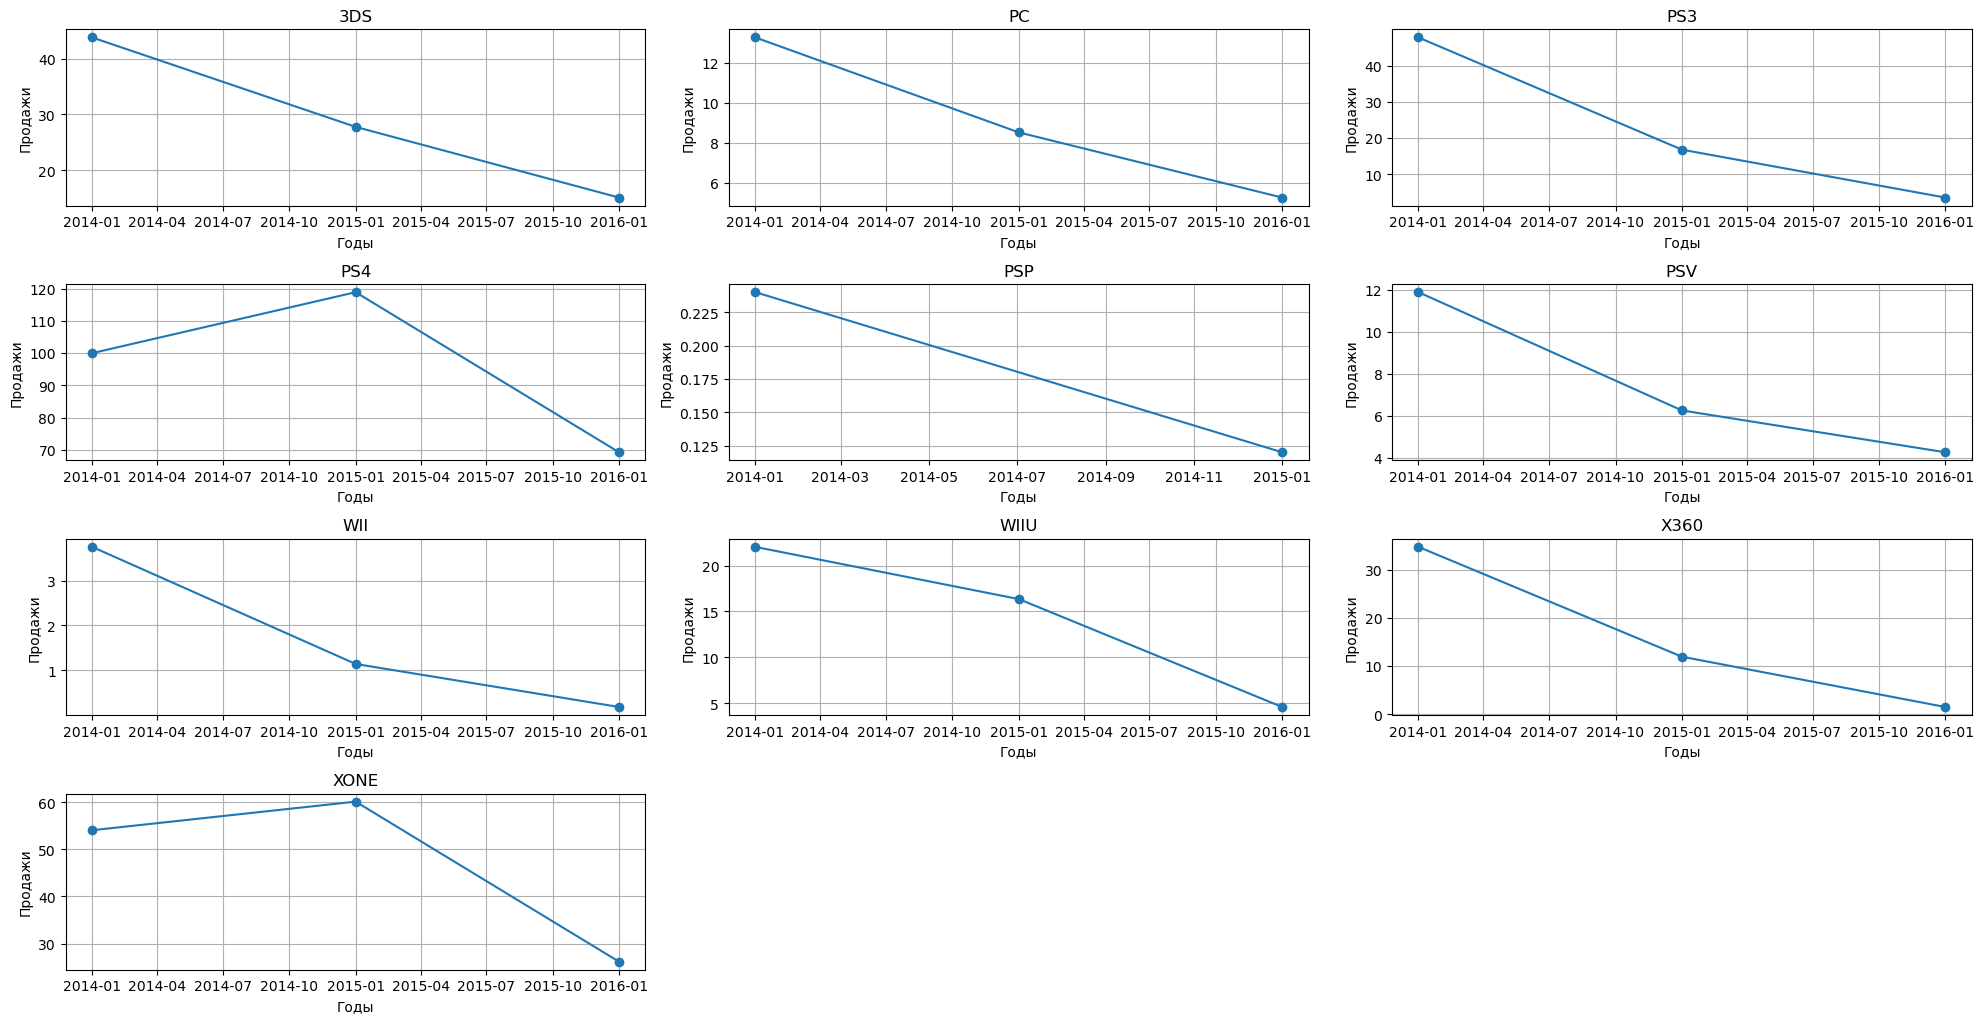

In [28]:
platforms = current_data.groupby('platform').agg({'total_sales': 'sum'}).index.to_list()

plt.figure(figsize=(20, 15))

i = 1

for platform in platforms:
    platform_data = current_data[current_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.subplot(6, 3, i)
    plt.plot(platform_data.index, platform_data.values, marker='o')
    plt.title(f'{platform.upper()}')
    plt.xlabel('Годы')
    plt.ylabel('Продажи')
    plt.grid()
    
    i += 1
    
plt.tight_layout()
plt.show()

Все платформы показывают падение продаж практиески до нуля, кроме `'PS4'` и `'XONE'`, значит их и будем считать потенциально прибыльными.

#### Размах продаж по платформам.

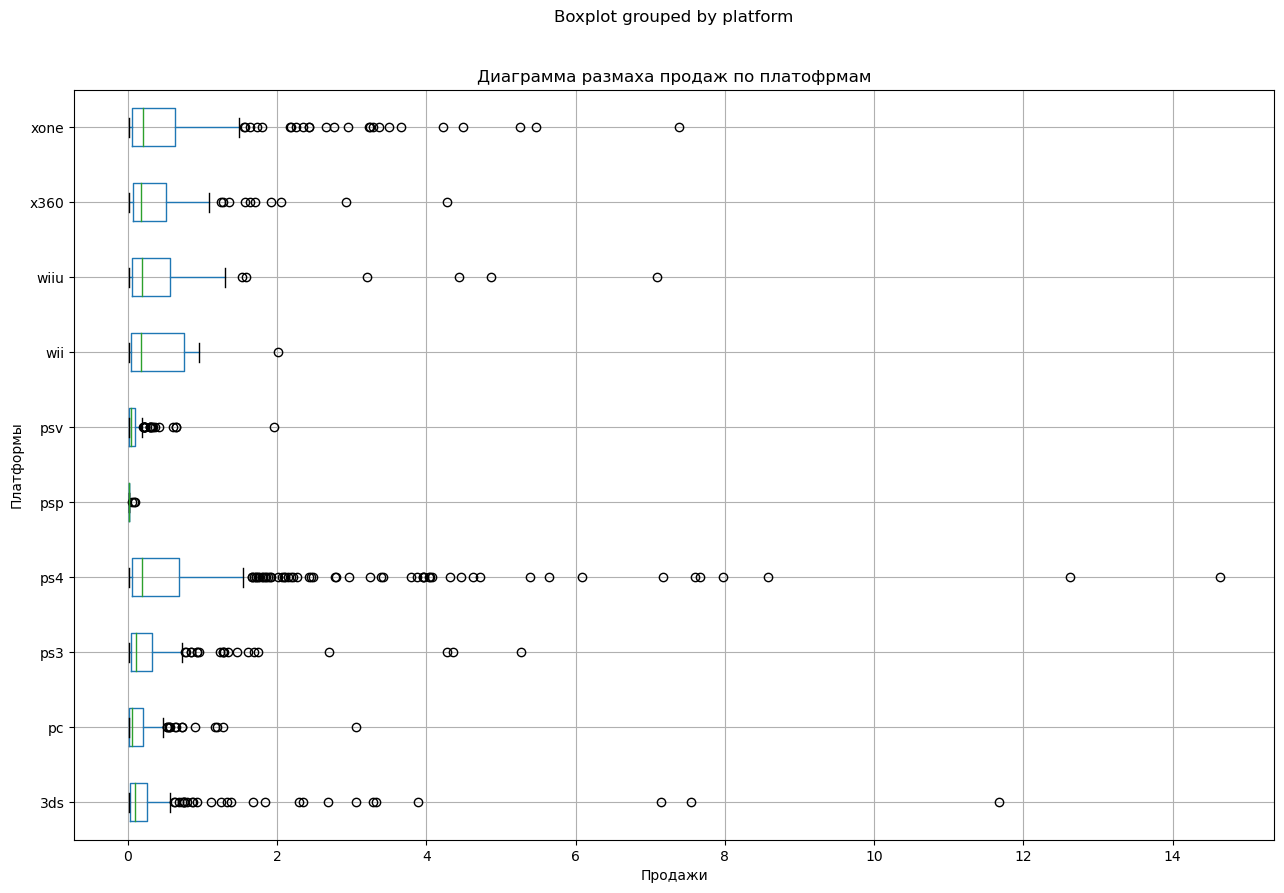

In [29]:
current_data.boxplot('total_sales', 'platform', figsize=(15, 10), vert=False)

plt.title('Диаграмма размаха продаж по платофрмам')
plt.xlabel('Продажи')
plt.ylabel('Платформы')

plt.show()

* самые низкие продажи у платформ `'psp'`, `'psv'` и `'wii'`.
* самые высокие продажи у `'xone'`, `'ps4'` и `'wiiu'`.
* данные по глобальным продажам имеют много выбросов практически у всех платформ. Выбросами являются продажи самых топовых и популярных игр.

#### Корреляция между отзывами и продажами на самой популярной платформе.

В качестве исследуемой платформы возьмём платформу с самыми большими продажами - `'ps4'`.

In [30]:
ps4 = current_data[current_data['platform'] == 'ps4'].reset_index(drop=True)

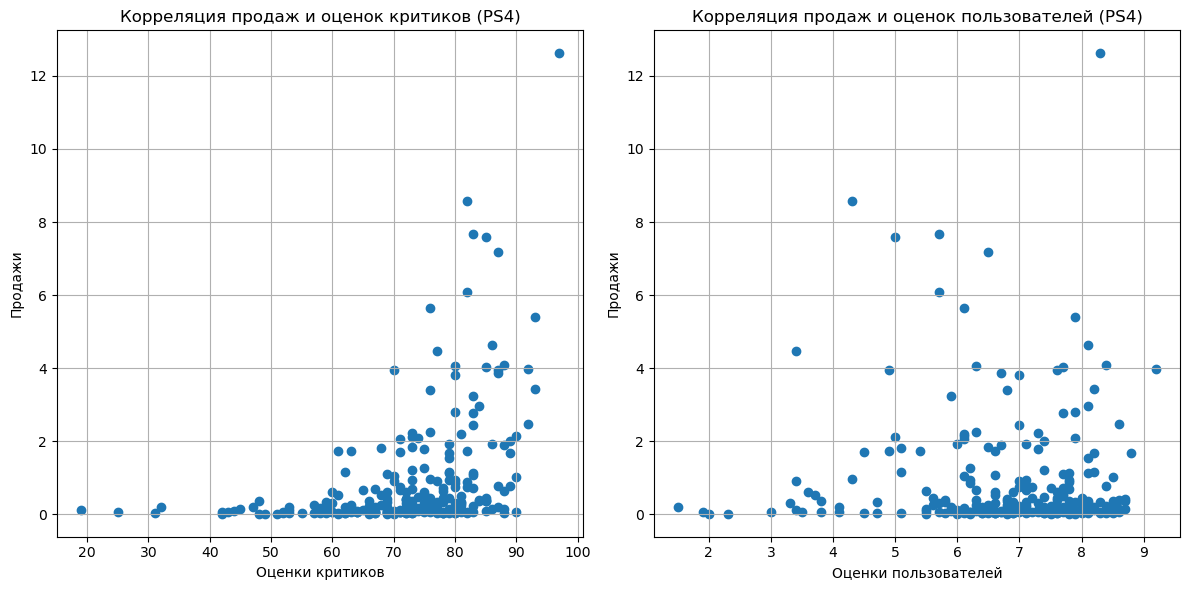

In [31]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].scatter(ps4['critic_score'], ps4['total_sales'])
ax[0].set_title('Корреляция продаж и оценок критиков (PS4)')
ax[0].set_xlabel('Оценки критиков')
ax[0].set_ylabel('Продажи')
ax[0].grid()

ax[1].scatter(ps4['user_score'], ps4['total_sales'])
ax[1].set_title('Корреляция продаж и оценок пользователей (PS4)')
ax[1].set_xlabel('Оценки пользователей')
ax[1].set_ylabel('Продажи')
ax[1].grid()

plt.tight_layout()
plt.show()

* коэффициент корреляции Пирсона между продажами и оценками критиков:

In [32]:
ps4['total_sales'].corr(ps4['critic_score'])

0.40266141068104083

* коэффициент корреляции Пирсона между продажами и оценками пользователей:

In [33]:
ps4['total_sales'].corr(ps4['user_score'])

-0.040131589472697356

Судя по диаграммам рассеяния и коэффициентам корреляции Пирсона, между продажами и оценками критиков имеется положительная связь, но не очень сильная, а вот между оценками пользователей и продажами игр связь обратная, то есть отрицательная, но слабая.

#### Корреляция между отзывами и продажами на остальных платформах.

Для удобства возьмём 6 самых популярных платформ из актуальных данных.

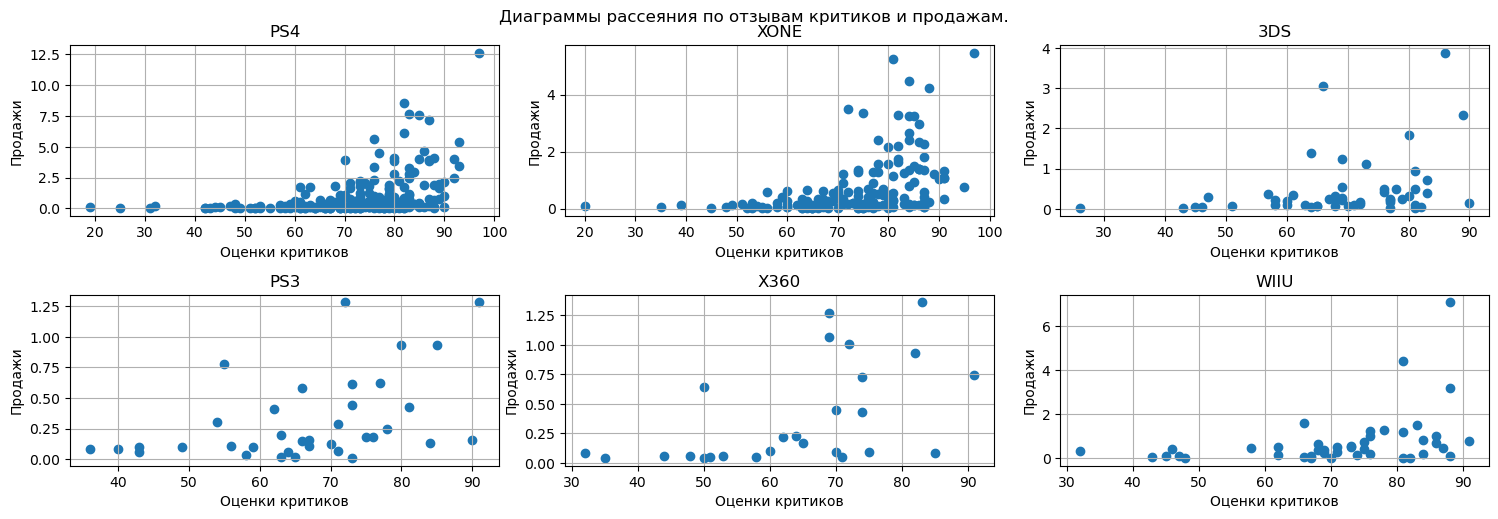

In [34]:
platforms = current_data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(
    by='total_sales', 
    ascending=False).head(6).index.to_list()

plt.figure(figsize=(15, 15))
plt.suptitle('Диаграммы рассеяния по отзывам критиков и продажам.')

i = 1

for platform in platforms:
    platform_data = current_data[current_data['platform'] == platform]
    plt.subplot(6, 3, i)
    plt.scatter(platform_data['critic_score'], platform_data['total_sales'])
    plt.title(f'{platform.upper()}')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи')
    plt.grid()
    
    i += 1
    
plt.tight_layout()
plt.show()

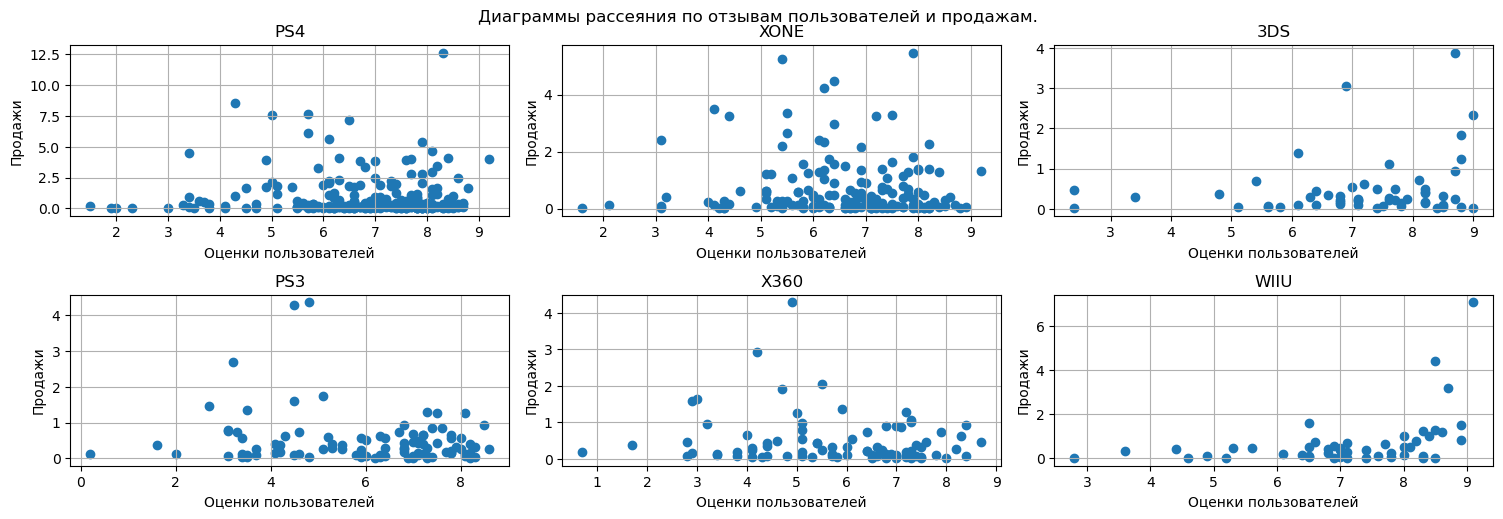

In [35]:
platforms = current_data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(
    by='total_sales', 
    ascending=False).head(6).index.to_list()

plt.figure(figsize=(15, 15))
plt.suptitle('Диаграммы рассеяния по отзывам пользователей и продажам.')

i = 1

for platform in platforms:
    platform_data = current_data[current_data['platform'] == platform]
    plt.subplot(6, 3, i)
    plt.scatter(platform_data['user_score'], platform_data['total_sales'])
    plt.title(f'{platform.upper()}')
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи')
    plt.grid()
    
    i += 1
    
plt.tight_layout()
plt.show()

**Коэффициент корреляции Пирсона по отзывам критиков и отзывам пользователей:**

In [36]:
def correlation(score_column):

    correlations = {}
    for platform in platforms:
        platform_df = current_data[current_data['platform'] == platform]
        correlation = platform_df['total_sales'].corr(platform_df[score_column])
        correlations[platform] = correlation
        print(f"Платформа: {platform}, Корреляция Пирсона: {correlation}")

    return correlations

print('Для отзывов критиков:')
critic_correlations = correlation('critic_score')
print()
print('Для отзывов пользователей:')
user_correlations = correlation('user_score')

Для отзывов критиков:
Платформа: ps4, Корреляция Пирсона: 0.40266141068104083
Платформа: xone, Корреляция Пирсона: 0.42867694370333226
Платформа: 3ds, Корреляция Пирсона: 0.31411749286905105
Платформа: ps3, Корреляция Пирсона: 0.44657460493190704
Платформа: x360, Корреляция Пирсона: 0.5257228356581523
Платформа: wiiu, Корреляция Пирсона: 0.370201412480884

Для отзывов пользователей:
Платформа: ps4, Корреляция Пирсона: -0.040131589472697356
Платформа: xone, Корреляция Пирсона: -0.0703839280647581
Платформа: 3ds, Корреляция Пирсона: 0.2151932718527028
Платформа: ps3, Корреляция Пирсона: -0.16676141347662116
Платформа: x360, Корреляция Пирсона: -0.138444570945665
Платформа: wiiu, Корреляция Пирсона: 0.4079264579217078


**Выводы:**
* отзывы критиков больше влияют на продажи, чем отзывы пользователей;
* платформа с самой высокой корреляцией по отзывам критиков - `'x360'`(0.52), а с самой низкой - `'3ds'`(0.31). В целом это средняя положительная зависимость;
* платформа с самой высокой корреляцией по отзывам пользователей - `'wiiu'`(0.40), a с самой низкой - `'ps3'`(-0.16). У 4-х из 6-ти платформ имеется отрицательная корреляция.

#### Распределение игр по жанрам.

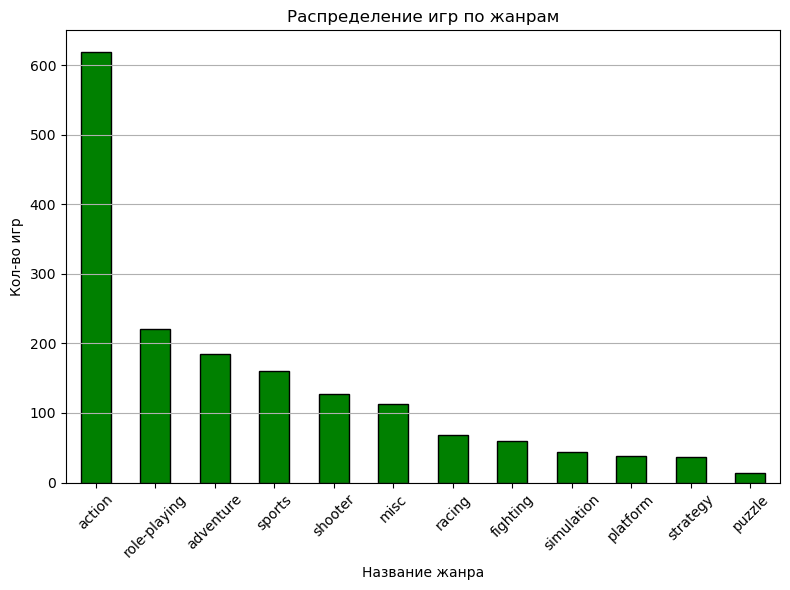

In [37]:
current_data.pivot_table(
    index='genre', 
    values='total_sales', 
    aggfunc='count').sort_values(
    by='total_sales', 
    ascending=False).plot(
    kind='bar', 
    figsize=(8, 6), 
    legend=False, 
    color='green',
    ec='black'
)

plt.xticks(rotation=45)
plt.title('Распределение игр по жанрам')
plt.xlabel('Название жанра')
plt.ylabel('Кол-во игр')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Самый популярный жанр - `'action'`, самый непопулярный - `'puzzle'`.

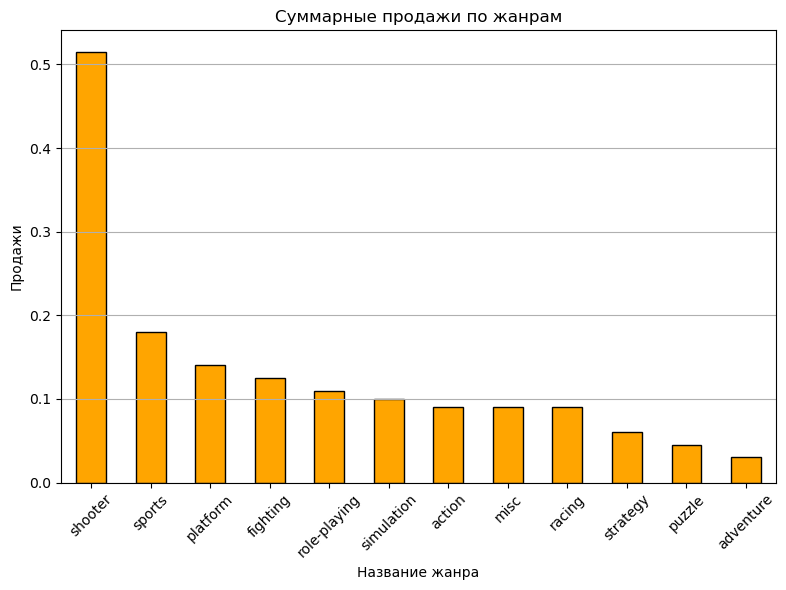

In [38]:
current_data.pivot_table(
    index='genre', 
    values='total_sales', 
    aggfunc='median').sort_values(
    by='total_sales', 
    ascending=False).plot(
    kind='bar', 
    figsize=(8, 6), 
    legend=False, 
    color='orange',
    ec='black'
)

plt.title('Суммарные продажи по жанрам')
plt.xlabel('Название жанра')
plt.ylabel('Продажи')
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Жанр с самыми высокими продажами - `'shooter'`, с самыми низкими - `'adventure'`.

**Итог раздела:**
1. До 1995 года игр выпускалось очень мало.
2. Средний срок жизни игровой платформы около 10 лет.
3. Исходя из предыдущего вывода можно обозначить актуальные данные для исследования с 2014 по 2016 год.
4. К потенциально прибыльным платформам можно отнести `'ps4'` и `'xone'`.
5. Cамые низкие продажи у платформ `'psp'`, `'psv'` и `'wii'`. Cамые высокие продажи у `'xone'`, `'ps4'` и `'wiiu'`. Данные по продажам имеют много выбросов.
6. Между отзывами критиков и продажами имеется пложительная корреляция, но не очень сильная. Между отзывами пользователей и продажами в основном имеется слабая отрицательная корреляция.
7. Жанр с самыми высокими продажами - `'shooter'`, с самыми низкими - `'adventure'`.
8. Самый популярный жанр - `'action'`, самый непопулярный - `'puzzle'`.

### Шаг. Портрет пользователя каждого региона.

#### Анализ пользователей региона Северная Америка (NA).

In [39]:
# Сводная таблица с сумарными продажами по платформам
sales_na = current_data.pivot_table(
    index='platform', 
    values='na_sales', 
    aggfunc='sum').sort_values(
    by='na_sales', 
    ascending=False
)
sales_na

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05
wiiu,19.36
pc,7.23
psv,2.52
wii,2.08


In [40]:
top_na = sales_na.head()  # Таблица с 5-ю самыми продающимися платформами

In [41]:
# Данные по остальным платформам
other_na = sales_na.iloc[5:].sum()
other_na

na_sales    31.19
dtype: float64

In [42]:
# Формирование датафрейма
other_na = pd.DataFrame(data={'na_sales':[31.19]}, index=['other'])

In [43]:
# Объединяю таблицы
final_na = pd.concat([top_na, other_na])
final_na

,na_sales
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05
other,31.19


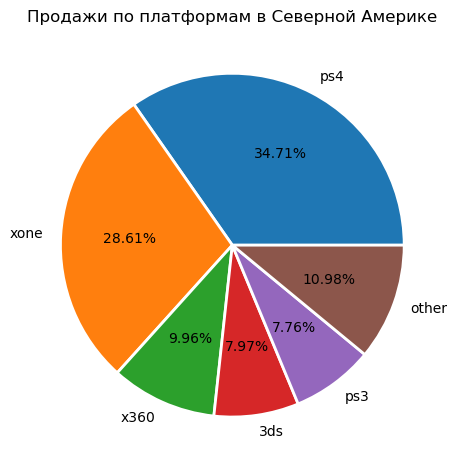

In [44]:
final_na.plot(kind='pie', y='na_sales', autopct='%1.2f%%', legend=False, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white'})

plt.title('Продажи по платформам в Северной Америке')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Топ 5 самых популярных платформ в Северной Америке (по убыванию):**
1. ps4
2. xone
3. x360
4. 3ds
5. ps3
* продажи `'ps4'` и `'xone'` занимают более половины рынка;
* на долю продаж платформ не входящих в топ 5 приходится всего лишь около 10%.

In [45]:
genre_na = current_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
genre_na

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05
fighting,12.43
racing,8.74
platform,6.79
adventure,5.64


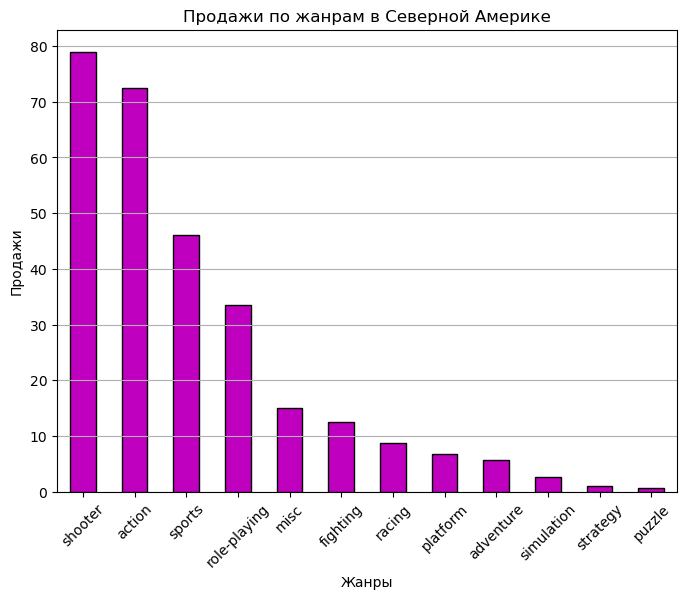

In [46]:
genre_na.plot(kind='bar', figsize=(8, 6), legend=False, color='m', ec='black')

plt.title('Продажи по жанрам в Северной Америке')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

**Топ 5 самых популярных жанров в Северной Америке (по убыванию):**
1. shooter
2. action
3. sports
4. role-playing
5. misc
* самый популярный жанр `'shooter'`, но так же от него недалеко отстаёт `action'`;
* разница между продажами `'action'` и `'sports'` составляет чуть менее 30 млн копий.

In [47]:
rating_na = current_data.pivot_table(
    index='rating', 
    values='na_sales', 
    aggfunc='sum').sort_values(
    by='na_sales', 
    ascending=False
)
rating_na

,na_sales
rating,
M,96.42
E,50.74
T,38.95
E10+,33.23


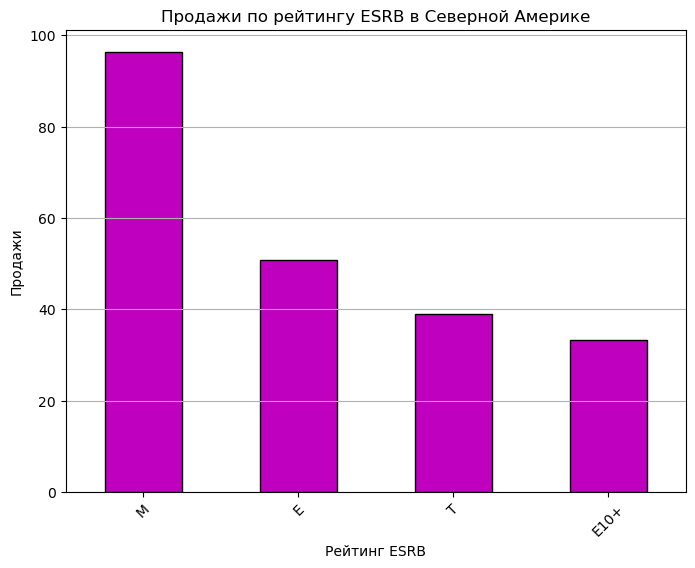

In [48]:
rating_na.plot(kind='bar', figsize=(8, 6), legend=False, color='m', ec='black')

plt.title('Продажи по рейтингу ESRB в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Больше всего продаж игр с рейтингом `М` - для лиц старше 17 лет, меньше всего с рейтингом `Е10+` - для детей старше 10 лет.

#### Анализ пользователей региона Европа (EU).

In [49]:
sales_eu = current_data.pivot_table(
    index='platform', 
    values='eu_sales', 
    aggfunc='sum').sort_values(
    by='eu_sales', 
    ascending=False
)
sales_eu

,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12
x360,15.49
wiiu,13.15
psv,3.53
wii,2.59


In [50]:
top_eu = sales_eu.head()

In [51]:
other_eu = sales_eu.iloc[5:].sum()
other_eu

eu_sales    34.76
dtype: float64

In [52]:
other_eu = pd.DataFrame(data={'eu_sales':[34.76]}, index=['other'])

In [53]:
final_eu = pd.concat([top_eu, other_eu])
final_eu

,eu_sales
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12
other,34.76


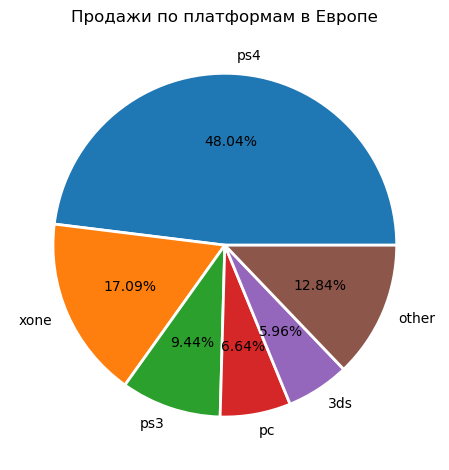

In [54]:
final_eu.plot(kind='pie', y='eu_sales', autopct='%1.2f%%', legend=False, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white'})

plt.title('Продажи по платформам в Европе')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Топ 5 самых популярных платформ в Европе (по убыванию):**
1. ps4
2. xone
3. ps3
4. pc
5. 3ds

* практически половину рынка в Европе занимают продажи `'ps4'`;
* так же крупную долю в 17% занимает `'xone'`;
* на долю всех остальных платформ не входящих в топ 5 приходится чуть меньше 13%.

In [55]:
genre_eu = current_data.pivot_table(
    index='genre', 
    values='eu_sales', 
    aggfunc='sum').sort_values(
    by='eu_sales', 
    ascending=False
)
genre_eu

,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13
misc,12.86
simulation,7.30
platform,6.80
fighting,6.69


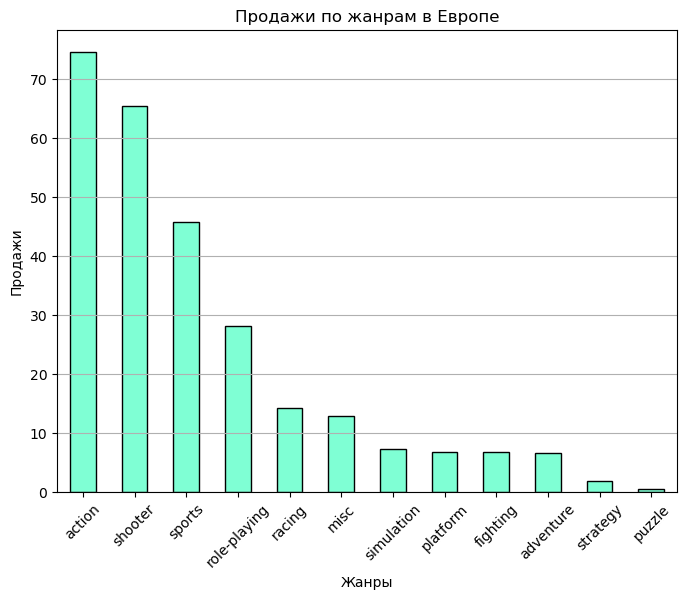

In [56]:
genre_eu.plot(kind='bar', figsize=(8, 6), legend=False, color='aquamarine', ec='black')

plt.title('Продажи по жанрам в Европе')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

**Топ 5 самых популярных жанров в Европе (по убыванию):**
1. action
2. shooter
3. sports
4. role-playing
5. racing
* самый популярный жанр - `'action'`, он обгоняет `'shooter'` почти на 10 млн;
* при этом жанр `'shoter'` обгоняет жанр `'sports'` на 20 млн;
* различия в продажах между `'role-playing'`, `'sports'` и `'racing'` около 15 млн.

In [57]:
rating_eu = current_data.pivot_table(
    index='rating', 
    values='eu_sales', 
    aggfunc='sum').sort_values(
    by='eu_sales', 
    ascending=False
)
rating_eu

,eu_sales
rating,
M,93.44
E,58.06
T,34.07
E10+,26.16


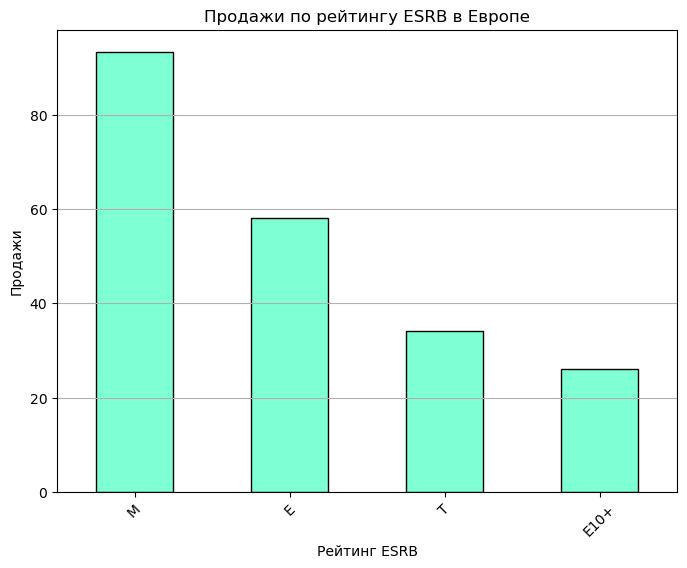

In [58]:
rating_eu.plot(kind='bar', figsize=(8, 6), legend=False, color='aquamarine', ec='black')

plt.title('Продажи по рейтингу ESRB в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Больше всего продаж игр с рейтингом `М` - для лиц старше 17 лет, меньше всего с рейтингом `Е10+` - для детей старше 10 лет.

#### Анализ пользователей региона Япония (JP).

In [59]:
sales_jp = current_data.pivot_table(
    index='platform', 
    values='jp_sales', 
    aggfunc='sum').sort_values(
    by='jp_sales', 
    ascending=False
)
sales_jp

,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31
psp,0.36
xone,0.32
x360,0.08
pc,0.00


In [60]:
top_jp = sales_jp.head()

In [61]:
other_jp = sales_jp.iloc[5:].sum()
other_jp

jp_sales    0.76
dtype: float64

In [62]:
other_jp = pd.DataFrame(data={'jp_sales':[0.76]}, index=['other'])

In [63]:
final_jp = pd.concat([top_jp, other_jp])
final_jp

,jp_sales
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31
other,0.76


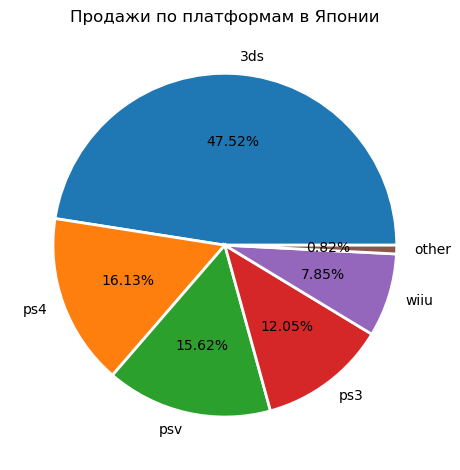

In [64]:
final_jp.plot(kind='pie', y='jp_sales', autopct='%1.2f%%', legend=False, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white'})

plt.title('Продажи по платформам в Японии')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Топ 5 самых популярных платформ в Японии (по убыванию):**
1. 3ds
2. ps4
3. psv
4. ps3
5. wiiu
* практически 99% рынка Японии занимают платформы входящие в топ 5;
* продажи `'3ds'` занимают около 50% рынка.

In [65]:
genre_jp = current_data.pivot_table(
    index='genre', 
    values='jp_sales', 
    aggfunc='sum').sort_values(
    by='jp_sales', 
    ascending=False
)
genre_jp

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87
adventure,3.60
sports,3.26
platform,2.69
simulation,2.31


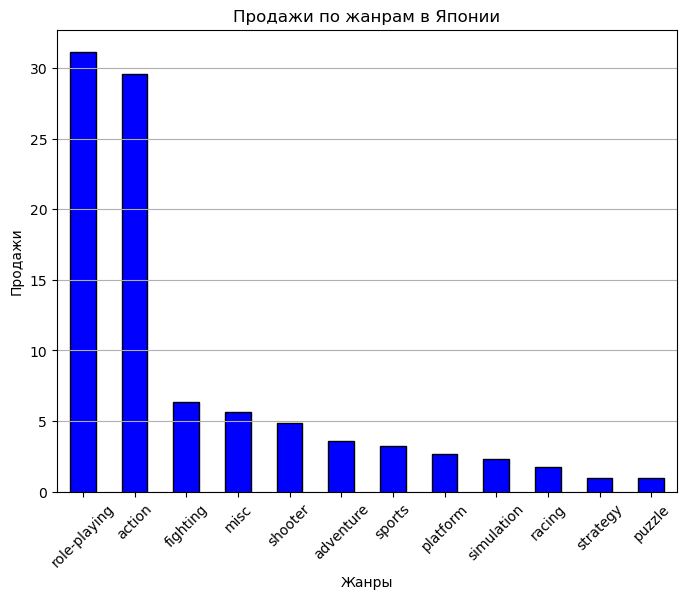

In [66]:
genre_jp.plot(kind='bar', figsize=(8, 6), legend=False, color='b', ec='black')

plt.title('Продажи по жанрам в Японии')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

**Топ 5 самых популярных жанров в Японии (по убыванию):**
1. role-playing
2. action
3. fighting
4. misc
5. shooter
* продажи `'role-playing'` и `'action'` находятся практически на одном уровне, разница составляет всего 2 млн;
* остальные жанры отстают от них на 20+ млн и находятся на примерно одинаковом уровне.

In [67]:
rating_jp = current_data.pivot_table(
    index='rating', 
    values='jp_sales', 
    aggfunc='sum').sort_values(
    by='jp_sales', 
    ascending=False
)
rating_jp

,jp_sales
rating,
T,14.78
E,8.94
M,8.01
E10+,4.46


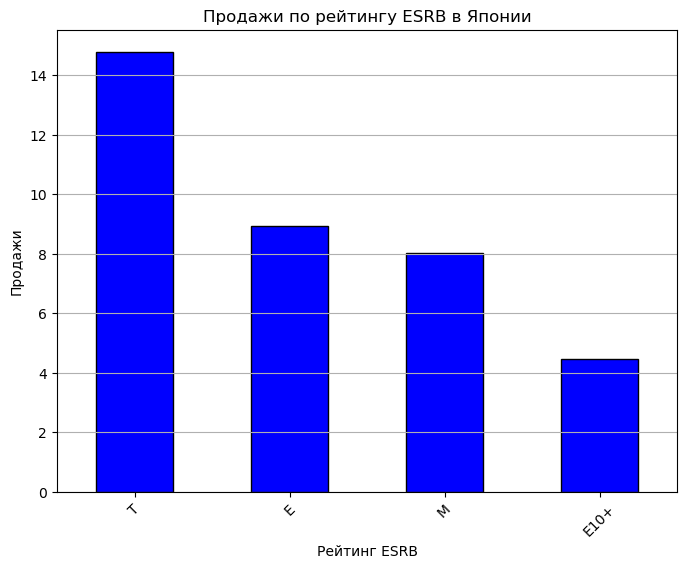

In [68]:
rating_jp.plot(kind='bar', figsize=(8, 6), legend=False, color='b', ec='black')

plt.title('Продажи по рейтингу ESRB в Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Больше всего продаж игр с рейтингом `М` - для лиц старше 17 лет, меньше всего с рейтингом `Е10+` - для детей старше 10 лет.

**Итог раздела:**
1. Самые популярные платформы: в Северной Америке и Европе - `'ps4'`, в Японии - `'3ds'`.
2. Самые популярные жанры игр: в Северной Америке - `'shooter'`, в Европе - `'action'`, в Японии - `'role-playing'`.
3. Самые популярные рейтинги игр: в Северной Америке, Европе и Японии - `Е` и `М`.

### Шаг. Проверка гипотез.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотезы:
* H$_0$: средние пользовательские рейтинги платформ Xbox One и PC равны.
* H$_1$: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [69]:
alpha = .05

sample_a = current_data[current_data['platform'] == 'xone']['user_score']
sample_b = current_data[current_data['platform'] == 'pc']['user_score']

results = st.ttest_ind(sample_a, sample_b, nan_policy='omit')

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value 0.10450507919348513
Не получилось отвергнуть нулевую гипотезу


**Вывод:** при уровне статистической значимости в 0.05 отврегнуть нулевую гипотезу нельзя.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотезы:
* H$_0$: средние пользовательские рейтинги жанров Action и Sports равны.
* H$_1$: средние пользовательские рейтинги жанров Action и Sports не равны.

In [70]:
alpha = .05

sample_a = current_data[current_data['genre'] == 'action']['user_score']
sample_b = current_data[current_data['genre'] == 'sports']['user_score']

results = st.ttest_ind(sample_a, sample_b, nan_policy='omit')

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value 2.8711147985107304e-19
Отвергаем нулевую гипотезу


**Вывод:** значение p-value очень маленькое, значит нужно отврегнуть нулевую гипотезу.

**Пояснения:**
1. В условии нулевой гипотезы всегда должно быть равенство, поэтому в обеих задачах я указала равенство пользовательских рейтингов платформ и жанров.
2. Для проверки гипотез я выбрала двустронний критерий `'two-sided'`, так как в гипотезах нет указания на преобладание одной из выборок. Данный критерий используется по умолчанию, поэтому его можно не указывать.

### Шаг. Общий вывод.

#### В этом проекте я проделала следующую работу:
1. Привела все названия столбцов к нижнему регистру.
2. Удалила пропуски из столбцов `'name'`, `'genre'`, `'year_of_release'`.
3. Заменила категорию `'K-A'` на `'E'` в столбце `'rating'` так как она являлась устаревшей.
4. Заменила значение `'tbd'` на NaN.
5. Поменяла тип данных в столбцах `'year_of_release'` и `'user_score'`.
6. Проверила данные на наличие явных и неявных дубликатов.
7. Посчитала суммарные продажи во всех регионах и записала их в столбец `'total_sales'`.
8. Провела исследовательский анализ данных: 
 * визуализировала количество выпускаемых игр в разные годы;
 * построила распределение продаж игр по платформам;
 * определила актуальный период для прогнозирования;
 * выбрала несколько потенциально прибыльных платформ;
 * построила график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
 * рассчитала и визуализировала корреляцию между продажей игр и отзывами пользователей и критиков;
 * рассчитала и визуализировала общее распределение игр по жанрам.
9. Составила портрет пользователя каждого региона:
 * описала самые популярные платформы (топ-5);
 * нашла самые популярные жанры (топ-5);
 * ответила на вопрос влияет ли рейтинг ESRB на продажи в отдельном регионе.
10. Проверила гипотезы о том, что:
 * средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 * средние пользовательские рейтинги жанров Action и Sports разные.

#### На основании проделанной работы можно сделать следующие выводы:
* Средний срок жизни игровой платформы около 10 лет.
* Актуальные данные для исследования - с 2014 по 2016 год.
* К потенциально прибыльным платформам можно отнести `'ps4'` и `'xone'`.
* Cамые низкие продажи у платформ `'psp'`, `'psv'` и `'wii'`. 
* Cамые высокие продажи у `'xone'`, `'ps4'` и `'wiiu'`.
* Между отзывами критиков и продажами имеется пложительная корреляция, но не очень сильная. 
* Между отзывами пользователей и продажами в основном имеется слабая отрицательная корреляция.
* Самый прибыльный и продаваемый жанр - `'shooter'`. Самый непопулярный и плохо продающийся жанр - `'adventure'`.
* Данные по продажам имеют много выбросов.
* Данные имеют много пропусков.
* Самые популярные платформы: в Северной Америке и Европе - `ps4`, в Японии - `3ds`.
* Самые популярные жанры игр: в Северной Америке - `shooter`, в Европе - `action`, в Японии - `role-playing`.
* Самые популярные рейтинги игр: в Северной Америке, Европе и Японии - `Е` и `М`.
* Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.
* Отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны.

#### Рекомендации:
1. Найти причину многочисленных пропусков в данных.
2. Узнать точное значение термина `'tbd'` в столбце с оценкой пользователей.
3. Наращивать продажи жанра `'action'`, так как он является самым популярным, значит на него есть спрос.
4. Сделать упор на платформы `'ps4'` и `'xone'`, так как они являются относительно новыми и набирают популярность, а остальные платформы входят в конец своего жизненного цикла.
5. Для региона Северная Америка следует сделать упор на платформу `'ps4'`, жанр '`shooter'`.
6. Для региона Европа можно сделать упор так же на платформу `'ps4'`, но жанр уже предпочтительнее `'action'`.
7. Для региона Япония актуальной платформой можно считать `'3ds'` и жанр `'role-playing'`.
8. Для всех регионов оценки пользователей можно не учитывать, а к оценкам критиков стоит прислушаться, но не нужно уделять им слишком много внимания.
9. Так же для всех регионов актуальные возрастные рейтинги игр `Е` и `М`.